# Infrastructure Investment & Jobs Act Funding Allocation
## Keeno Glanville

![Example Image](https://s.abcnews.com/images/Politics/biden-powell-gty-ml-211122_1637606167248_hpMain.jpg)

## To understand the the problem at hand we first have to decide where we will get our data from. In this assignment I will utilize census data from census.gov as well as election data from fec.gov. These are both sources of data that we can utilize for our benefit of the assignment. The only thing is we have to clean the data to make sure they link into each other by State names. As there are some typographical errors in these datasets.

In [1]:
# Load libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
funding = pd.read_excel('IIJA FUNDING AS OF MARCH 2023.xlsx')
funding

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000
5,CALIFORNIA,18.4000
6,COLORADO,3.2000
7,CONNECTICUT,2.5000
8,DELAWARE,0.7920
9,DISTRICT OF COLUMBIA,1.1000


In [12]:
funding.rename(columns={funding.columns[0]: 'State'}, inplace=True)

# List of valid US states
#funding = funding[~funding['State'].str.upper().isin(['PUERTO RICO', 'GUAM', 'AMERICAN SAMOA', 'DISTRICT OF COLUMBIA', 'TRIBAL COMMUNITIES', 'US VIRGIN ISLANDS', 'NORTHERN MARIANA ISLANDS'])]

# Convert the 'State' column to title case
funding['State'] = funding['State'].apply(lambda x: ' '.join(word.capitalize() if len(word) > 2 else word for word in x.split()))
funding['Total (Billions)'] = funding['Total (Billions)'].round(2)

# Reset the index
funding.reset_index(drop=True, inplace=True)

funding

,State,Total (Billions)
0,Alabama,3.00
1,Alaska,3.70
2,American Samoa,0.07
3,Arizona,3.50
4,Arkansas,2.80
5,California,18.40
6,Colorado,3.20
7,Connecticut,2.50
8,Delaware,0.79
9,District OF Columbia,1.10


In [13]:
population = pd.read_excel('NST-EST2022-POP.xlsx',header=[3, 4])
# Reset the index
population.reset_index(drop=True, inplace=True)
population

,Unnamed: 0_level_0,Unnamed: 1_level_0,2020,2021,2022
,United States,331449520,331511512,332031554,333287557
0,Northeast,57609156.0,57448898.0,57259257.0,57040406.0
1,Midwest,68985537.0,68961043.0,68836505.0,68787595.0
2,South,126266262.0,126450613.0,127346029.0,128716192.0
3,West,78588565.0,78650958.0,78589763.0,78743364.0
4,.Alabama,5024356.0,5031362.0,5049846.0,5074296.0
...,...,...,...,...,...
57,Note: The estimates are developed from a base ...,NaN,NaN,NaN,NaN
58,Suggested Citation:,NaN,NaN,NaN,NaN
59,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN


In [14]:
population = population[[
    ('Unnamed: 0_level_0', 'United States'),
    (2022, 333287557)
]]
# Rename columns
population.columns = ['State', 'Population (2022)']

# Remove leading dots from state names and make sure they are spelled correctly
population.loc[:, 'State'] = population['State'].str.replace(r'^\.', '', regex=True)

# Drop rows by index
rows_to_delete = [0, 1, 2, 3, 55, 57, 58, 59, 60, 61]
population = population.drop(rows_to_delete, axis=0)

# Reset the index
population.reset_index(drop=True, inplace=True)

population

,State,Population (2022)
0,Alabama,5074296.0
1,Alaska,733583.0
2,Arizona,7359197.0
3,Arkansas,3045637.0
4,California,39029342.0
5,Colorado,5839926.0
6,Connecticut,3626205.0
7,Delaware,1018396.0
8,District of Columbia,671803.0
9,Florida,22244823.0


In [15]:
elections = pd.read_excel('federalelections2020.xlsx', sheet_name='3. Table 2 Electoral & Pop Vote')
elections

,2020 PRESIDENTIAL ELECTORAL AND POPULAR VOTE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE,ELECTORAL VOTE,ELECTORAL VOTE,POPULAR VOTE,POPULAR VOTE,POPULAR VOTE,POPULAR VOTE
2,NaN,Biden (D),Trunp (R),Biden (D),Trunp (R),All Others,Total Vote
3,AL,NaN,9,849624,1441170,32488,2323282
4,AK,NaN,3,153778,189951,15801,359530
5,AZ,11,NaN,1672143,1661686,53497,3387326
6,AR,NaN,6,423932,760647,34490,1219069
7,CA,55,NaN,11110639,6006518,384223,17501380
8,CO,9,NaN,1804352,1364607,88021,3256980
9,CT,7,NaN,1080831,714717,28309,1823857


In [16]:
# Rename the columns
elections.columns = ['State', 'Biden(D) Electoral Vote', 'Trump(R) Electoral Vote', 'Biden Popular Vote', 'Trump Popular Vote', 'Popular Vote (All Others)', 'Popular Vote (Total)']

# Set 'ELECTORAL VOTE' to 0 where it's NaN
elections['Biden(D) Electoral Vote'].fillna(0, inplace=True)
elections['Trump(R) Electoral Vote'].fillna(0, inplace=True)

# Rename the state abbreviations to full names
state_names = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME*': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE*': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

elections['State'] = elections['State'].map(state_names)

# Reset the index
elections = elections.iloc[3:-4]
elections.reset_index(drop=True, inplace=True)
elections


,State,Biden(D) Electoral Vote,Trump(R) Electoral Vote,Biden Popular Vote,Trump Popular Vote,Popular Vote (All Others),Popular Vote (Total)
0,Alabama,0,9,849624,1441170,32488,2323282
1,Alaska,0,3,153778,189951,15801,359530
2,Arizona,11,0,1672143,1661686,53497,3387326
3,Arkansas,0,6,423932,760647,34490,1219069
4,California,55,0,11110639,6006518,384223,17501380
5,Colorado,9,0,1804352,1364607,88021,3256980
6,Connecticut,7,0,1080831,714717,28309,1823857
7,Delaware,3,0,296268,200603,7475,504346
8,District of Columbia,3,0,317323,18586,8447,344356
9,Florida,0,29,5297045,5668731,101680,11067456


In [20]:
merged_df = pd.merge(elections, population, on='State', how='outer')
merged_df

,State,Biden(D) Electoral Vote,Trump(R) Electoral Vote,Biden Popular Vote,Trump Popular Vote,Popular Vote (All Others),Popular Vote (Total),Population (2022)
0,Alabama,0,9,849624,1441170,32488,2323282,5074296.0
1,Alaska,0,3,153778,189951,15801,359530,733583.0
2,Arizona,11,0,1672143,1661686,53497,3387326,7359197.0
3,Arkansas,0,6,423932,760647,34490,1219069,3045637.0
4,California,55,0,11110639,6006518,384223,17501380,39029342.0
5,Colorado,9,0,1804352,1364607,88021,3256980,5839926.0
6,Connecticut,7,0,1080831,714717,28309,1823857,3626205.0
7,Delaware,3,0,296268,200603,7475,504346,1018396.0
8,District of Columbia,3,0,317323,18586,8447,344356,671803.0
9,Florida,0,29,5297045,5668731,101680,11067456,22244823.0


In [22]:
# Merge population elections  funding
# First merge with population
#df = population.merge(elections, on='State', how='inner')

# Merge the resulting DataFrame with funding on the 'State' column while preserving the index
#df = df.merge(funding, left_index=True, right_index=True, how='inner')

# Now 'df' will have its index preserved
df = pd.merge(merged_df, funding, on='State', how='left')
df

,State,Biden(D) Electoral Vote,Trump(R) Electoral Vote,Biden Popular Vote,Trump Popular Vote,Popular Vote (All Others),Popular Vote (Total),Population (2022),Total (Billions)
0,Alabama,0,9,849624,1441170,32488,2323282,5074296.0,3.00
1,Alaska,0,3,153778,189951,15801,359530,733583.0,3.70
2,Arizona,11,0,1672143,1661686,53497,3387326,7359197.0,3.50
3,Arkansas,0,6,423932,760647,34490,1219069,3045637.0,2.80
4,California,55,0,11110639,6006518,384223,17501380,39029342.0,18.40
5,Colorado,9,0,1804352,1364607,88021,3256980,5839926.0,3.20
6,Connecticut,7,0,1080831,714717,28309,1823857,3626205.0,2.50
7,Delaware,3,0,296268,200603,7475,504346,1018396.0,0.79
8,District of Columbia,3,0,317323,18586,8447,344356,671803.0,NaN
9,Florida,0,29,5297045,5668731,101680,11067456,22244823.0,8.20


c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

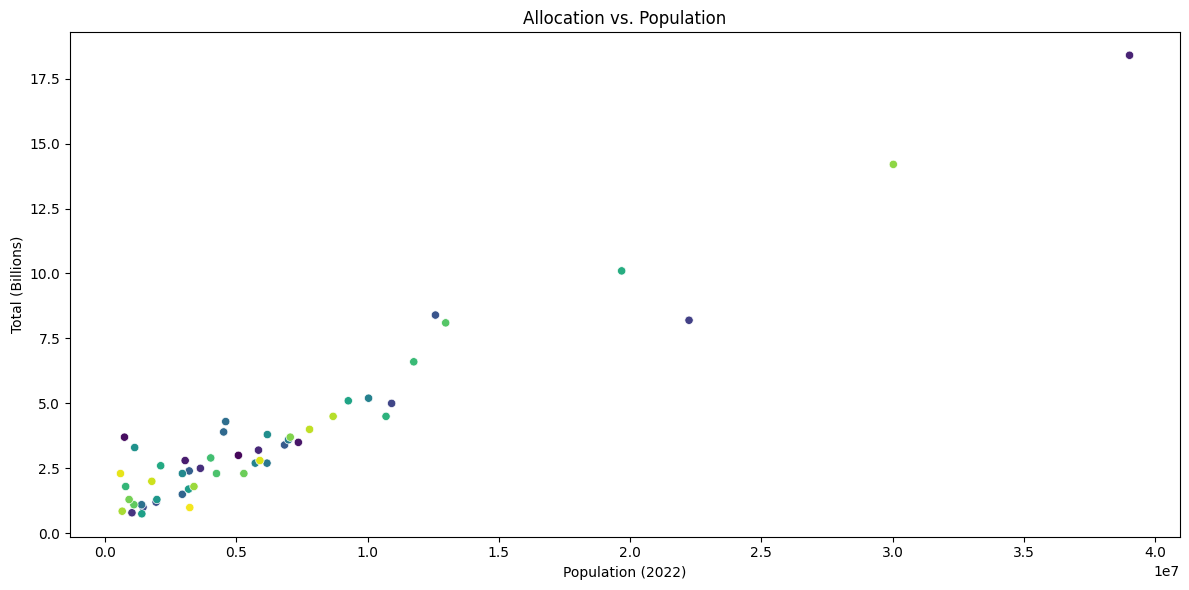

In [23]:
# Visualization 1: Allocation vs. Population
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Population (2022)', y='Total (Billions)', hue='State', palette='viridis', legend=False)
plt.title('Allocation vs. Population')
plt.xlabel('Population (2022)')
plt.ylabel('Total (Billions)')
plt.tight_layout()
plt.show()


c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

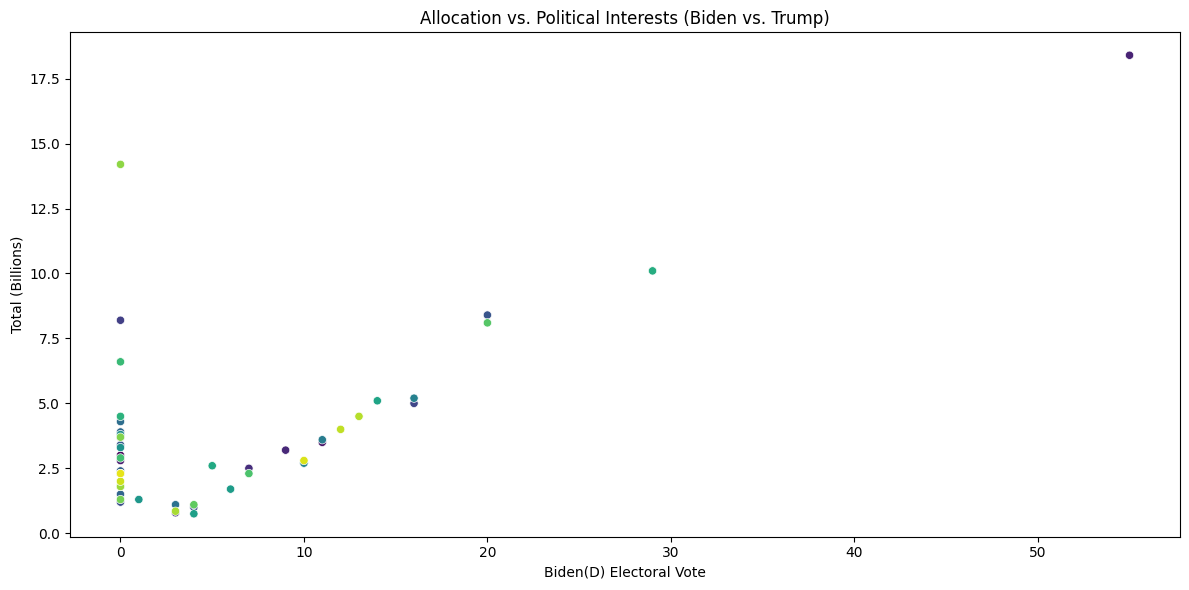

In [25]:
# Visualization 2: Allocation vs. Political Interests (Biden vs. Trump)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Biden(D) Electoral Vote', y='Total (Billions)', hue='State', palette='viridis', legend=False)
plt.title('Allocation vs. Political Interests (Biden vs. Trump)')
plt.xlabel('Biden(D) Electoral Vote')
plt.ylabel('Total (Billions)')
plt.tight_layout()
plt.show()

In [28]:
#Calculate Ratio of Popular Votes to Biden
df['Ratio of Popular vote (Biden)'] = df['Biden Popular Vote']/df['Popular Vote (Total)']

# Calculate allocation per capita (Total Billions / Population 2022)
df['Allocation per Capita'] = df['Total (Billions)'] / df['Population (2022)']

In [38]:
df.columns

Index(['State', 'Biden(D) Electoral Vote', 'Trump(R) Electoral Vote',
       'Biden Popular Vote', 'Trump Popular Vote', 'Popular Vote (All Others)',
       'Popular Vote (Total)', 'Population (2022)', 'Total (Billions)',
       'Allocation per Capita', 'Ratio of Popular vote (Biden)'],
      dtype='object')

c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

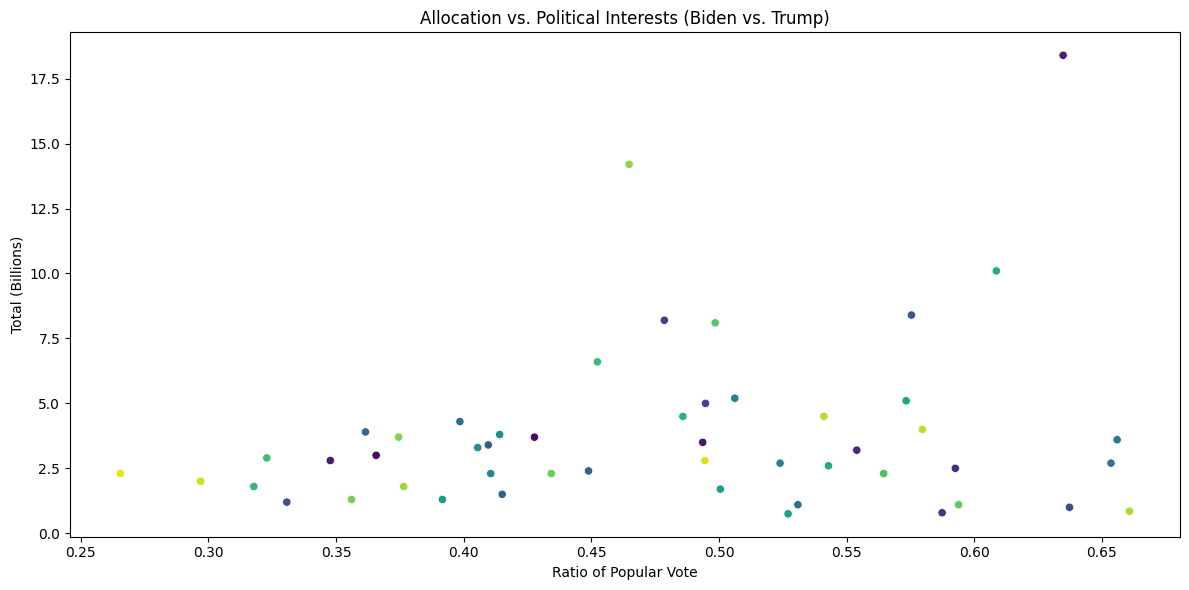

In [41]:
colors = ['red' if x == 0 else 'blue' for x in df['Biden(D) Electoral Vote']]


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Ratio of Popular vote (Biden)', y='Total (Billions)', hue='State', palette='viridis', legend=False)
plt.title('Allocation vs. Political Interests (Biden vs. Trump)')
plt.xlabel('Ratio of Popular Vote')
plt.ylabel('Total (Billions)')
plt.tight_layout()
plt.show()


c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


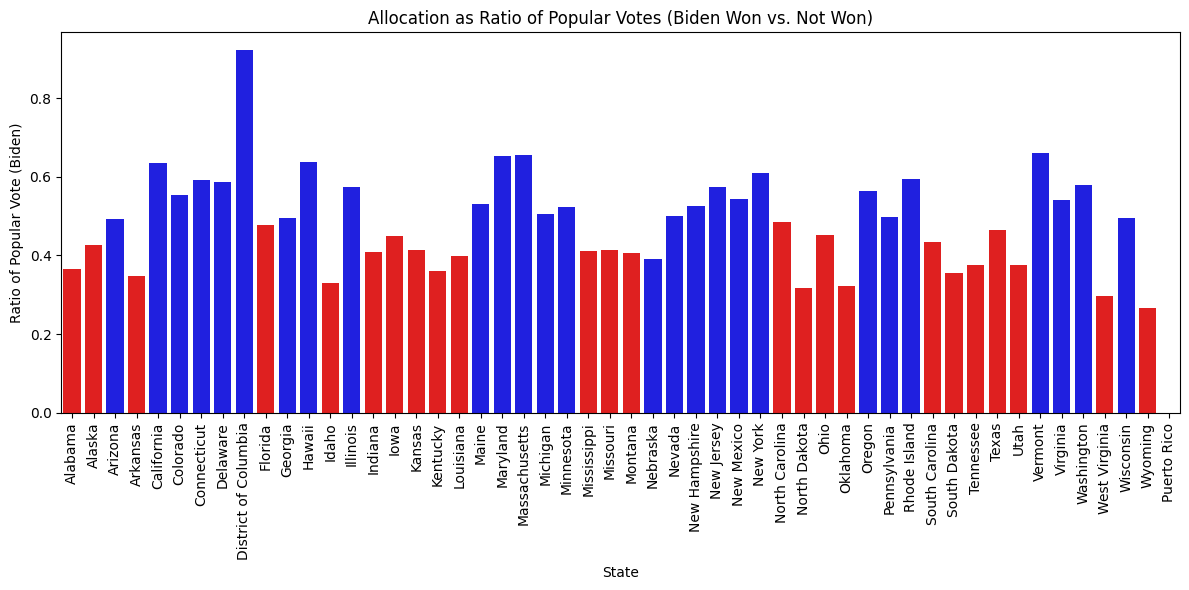

In [39]:
# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Ratio of Popular vote (Biden)', palette=colors)
plt.title('Allocation as Ratio of Popular Votes (Biden Won vs. Not Won)')
plt.xlabel('State')
plt.ylabel('Ratio of Popular Vote (Biden)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


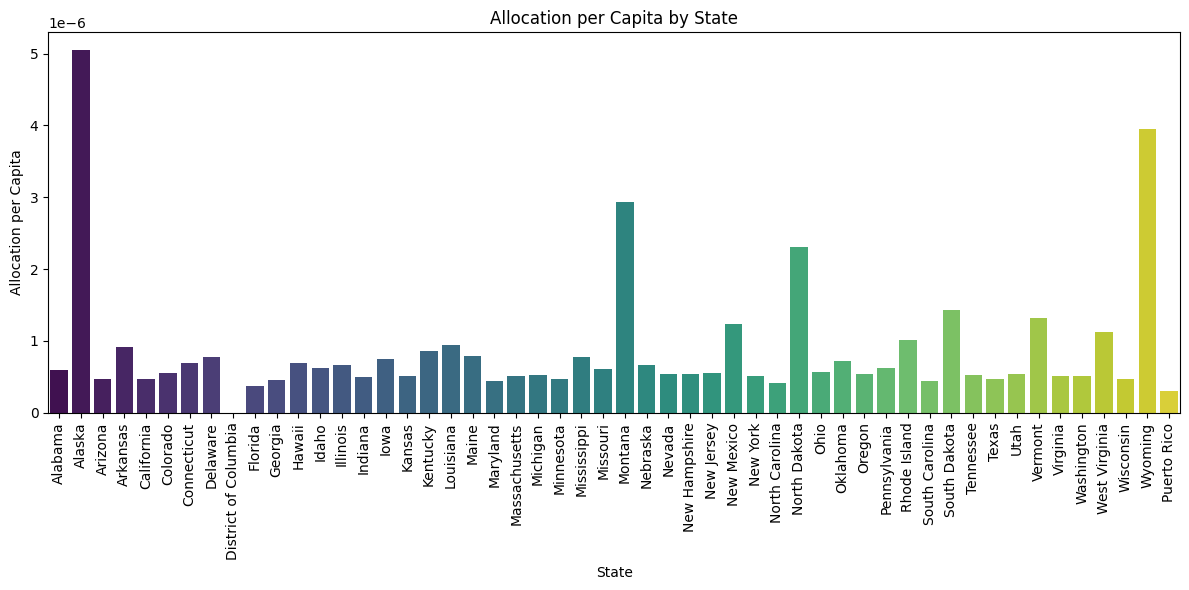

In [35]:
# Visualization 3: Allocation per Capita
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Allocation per Capita', palette='viridis')
plt.title('Allocation per Capita by State')
plt.xlabel('State')
plt.ylabel('Allocation per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


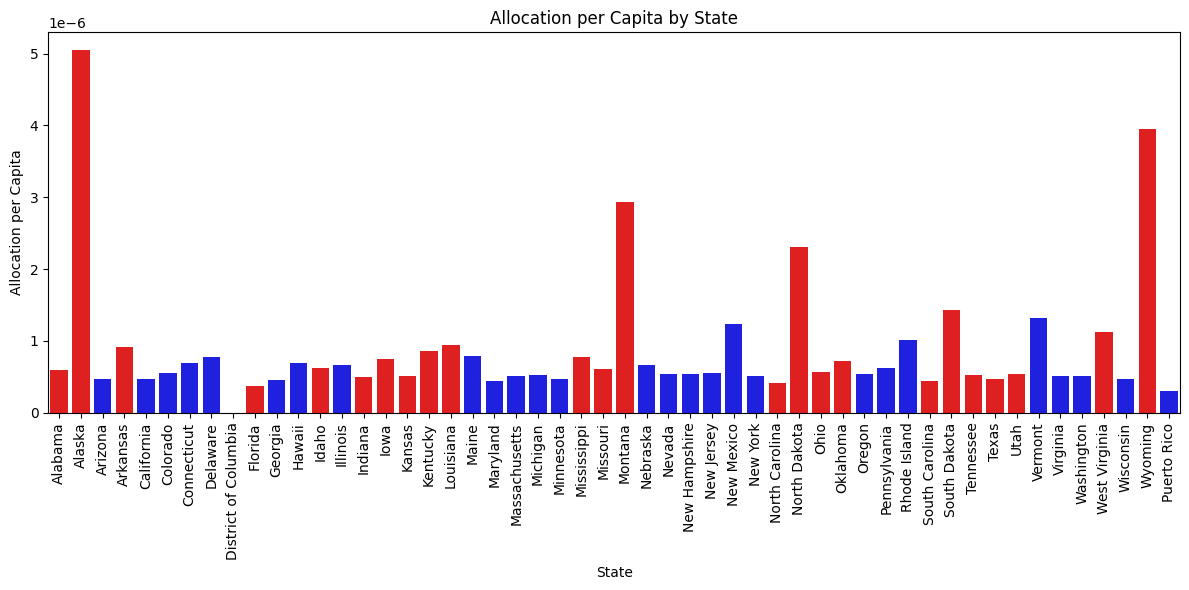

In [36]:

# Define a custom color palette
colors = ['red' if x == 0 else 'blue' for x in df['Biden(D) Electoral Vote']]

# Visualization 3: Allocation per Capita
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Allocation per Capita', palette=colors)
plt.title('Allocation per Capita by State')
plt.xlabel('State')
plt.ylabel('Allocation per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
# Visualization of Allocation by ratio of popular vote
df['Allocation per Vote(Ratio)'] = df['Total (Billions)'] / df['Ratio of Popular vote (Biden)']

c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


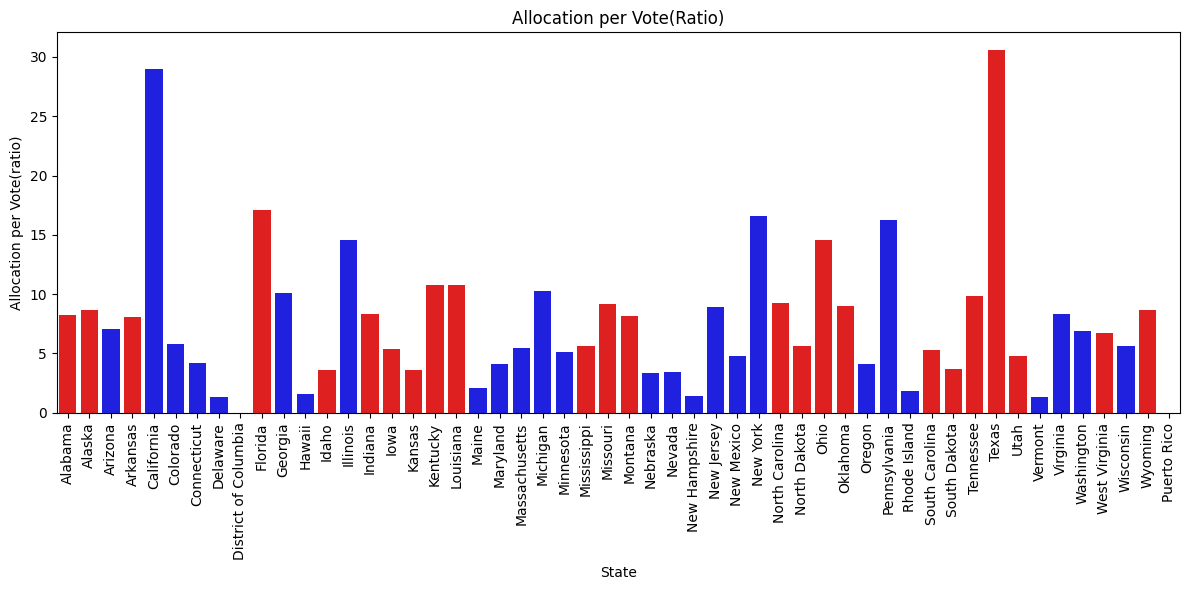

In [50]:
# Define a custom color palette
colors = ['red' if x == 0 else 'blue' for x in df['Biden(D) Electoral Vote']]

# Visualization 3: Allocation per Capita
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Allocation per Vote(Ratio)', palette=colors)
plt.title('Allocation per Vote(Ratio)')
plt.xlabel('State')
plt.ylabel('Allocation per Vote(ratio)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

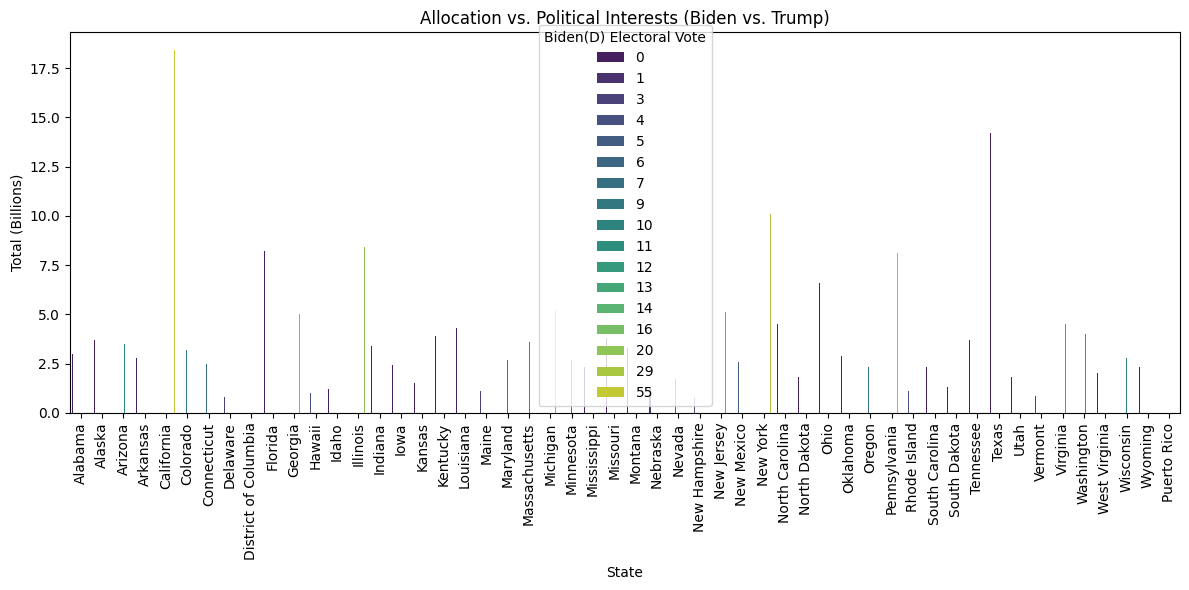

In [55]:
# Allocation vs. Political Interests (Biden vs. Trump)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Total (Billions)', hue='Biden(D) Electoral Vote', palette='viridis')
plt.title('Allocation vs. Political Interests (Biden vs. Trump)')
plt.xlabel('State')
plt.ylabel('Total (Billions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keeno\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


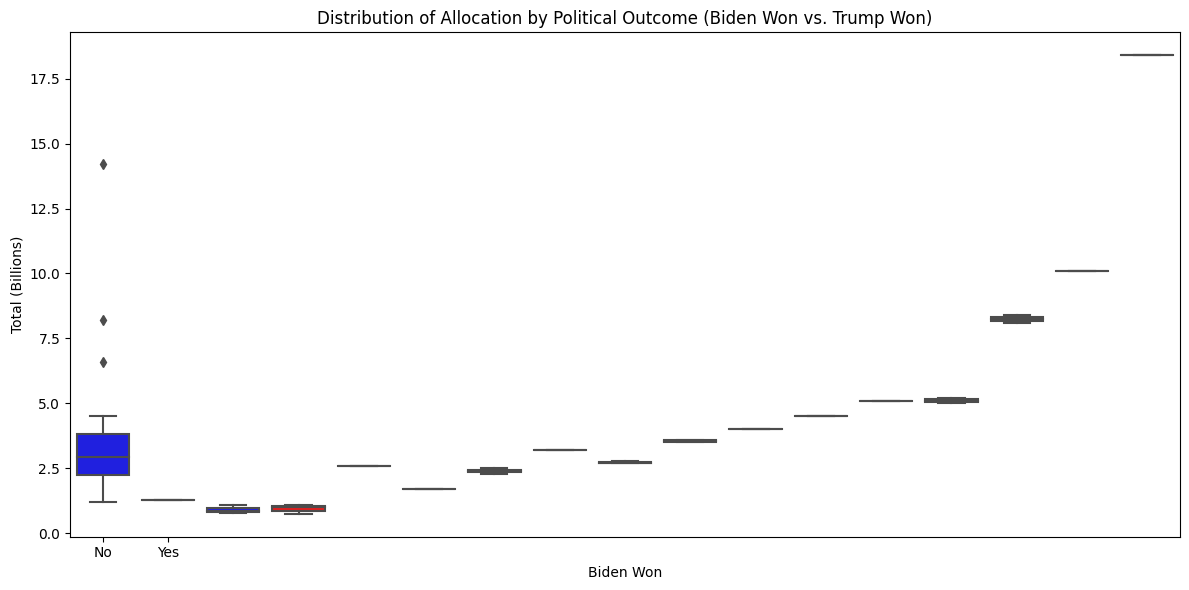

In [58]:
# Visualization: Box Plot
plt.figure(figsize=(12, 6))
colors = ['blue', 'red']
sns.boxplot(data=df, x='Biden(D) Electoral Vote', y='Total (Billions)', palette=colors)
plt.title('Distribution of Allocation by Political Outcome (Biden Won vs. Trump Won)')
plt.xlabel('Biden Won')
plt.ylabel('Total (Billions)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Conclusion
This dataset shows us that bias is where you want it to lie. It is easy to represent the data in a way that shows clear and obvious bias for areas like the District of Columbia or states like California. This could be seen when you look at plots of his allocation to states based on his popular vote count. However you could also look at his allocation per capita and make the argument that he is targetting states he lsot in order to convince them within his next elections. The truth of the matter is we see a direct linear relationship between populationa nd allocation. Which makes sense since this is an infrastructure bill it would be going to places needed that resource which tend to be densely populated areas. This is significant because due to these high populatrion areas, winning the electorial college here would automaticlaly give you an influx or popular votes and thus could skew the argument for bias where it just concerns population. The deciding factor came when I created the illustration for allocation per vote (ratio) which didnt show any real difference in his choosing as a percentage of his popular votes.

# Sources

## Population - United States Census census.gov
https://l.facebook.com/l.php?u=https%3A%2F%2Fwww.census.gov%2Fdata%2Fdatasets%2Ftime-series%2Fdemo%2Fpopest%2F2020s-national-total.html%3Ffbclid%3DIwAR314xWHGjSyUuhLtobdOGEXSAGzuw7VgoKycKpEbMC6NbBtXjFEtZxYSDs&h=AT0P3ErNKt3yRZNRmxYZwoe4NdE46pbcyel7WvnBhsOZ9sEe9DxgoXgqkki1ZvoeNf22hBfdM64pug6ThiL0Ep9YLmWw9ZU83oNuYSUr3vfJFtEIzqsY08ejuLGQtNQyzLVCd8TX9FZhTlGk7RKEKQ

## Election - Federal Election Commission(USA) fec.gov
https://www.fec.gov/introduction-campaign-finance/election-and-voting-information/federal-elections-2020/?fbclid=IwAR12WYwKPyurVdBwKIDHwnRf4-qoZ7d7e9Z3rK8tuan8KllR-ziIc-tSSgw